<a href="https://colab.research.google.com/github/shimchu/Quick_Draw/blob/main/small_data_Quick_Draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import files

--2024-07-29 16:24:54--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘quickdraw_data/apple.npy’

apple.npy           100%[===================>] 108.21M   118MB/s    in 0.9s    

2024-07-29 16:24:55 (118 MB/s) - ‘quickdraw_data/apple.npy’ saved [113462128/113462128]

--2024-07-29 16:24:55--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24142190

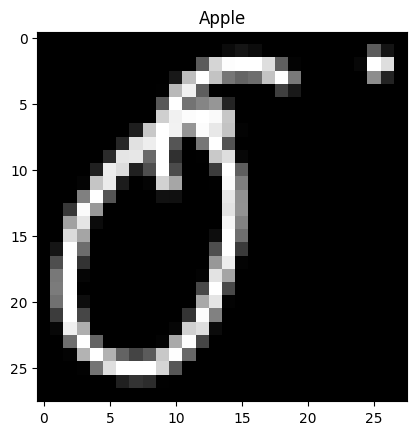

In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a directory to store the dataset
os.makedirs('quickdraw_data', exist_ok=True)

# Download the dataset using wget
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget -P quickdraw_data https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy

# Load the dataset
apple = np.load('quickdraw_data/apple.npy')
banana = np.load('quickdraw_data/banana.npy')
bicycle = np.load('quickdraw_data/bicycle.npy')

# Print the shape of the dataset
print('Apple:', apple.shape)
print('Banana:', banana.shape)
print('Bicycle:', bicycle.shape)

# Display a sample image from the dataset
plt.imshow(apple[0].reshape(28, 28), cmap='gray')
plt.title('Apple')
plt.show()


class_names = ['apple', 'banana', 'bicycle']


Epoch 1/10
150/150 [==============================] - 6s 9ms/step - loss: 0.2508 - accuracy: 0.9117 - val_loss: 0.1657 - val_accuracy: 0.9550
Epoch 2/10
150/150 [==============================] - 1s 5ms/step - loss: 0.1102 - accuracy: 0.9671 - val_loss: 0.1175 - val_accuracy: 0.9600
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.1591 - val_accuracy: 0.9592
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.1087 - val_accuracy: 0.9592
Epoch 5/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0944 - val_accuracy: 0.9667
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.1006 - val_accuracy: 0.9650
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.1144 - val_accuracy: 0.9650
Epoch 

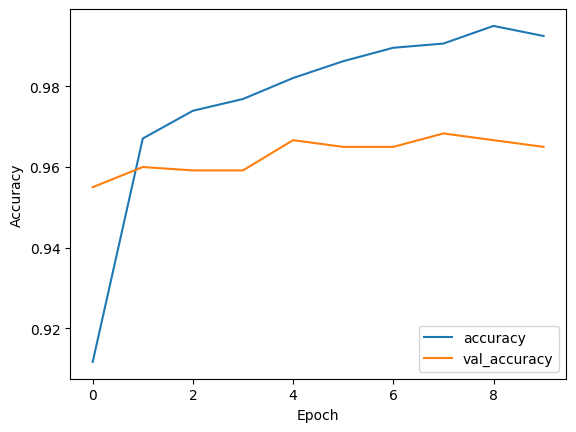

1/1 [==============================] - 0s 191ms/step


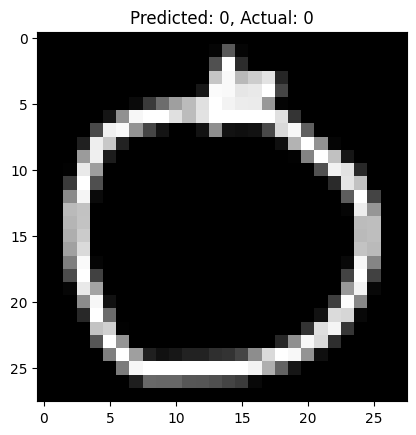

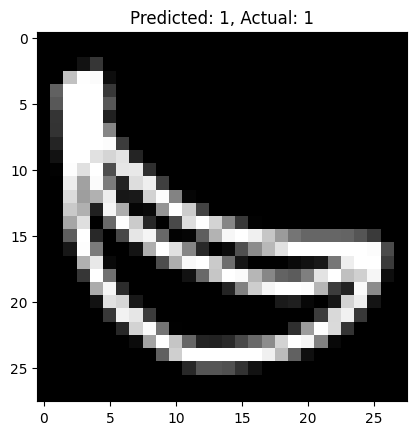

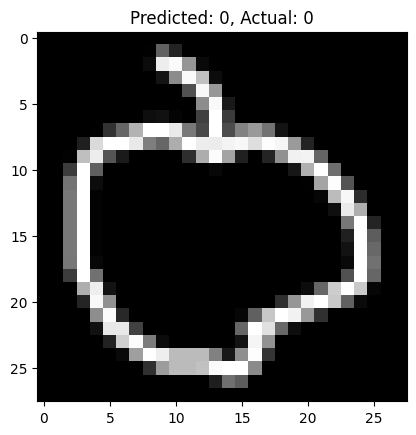

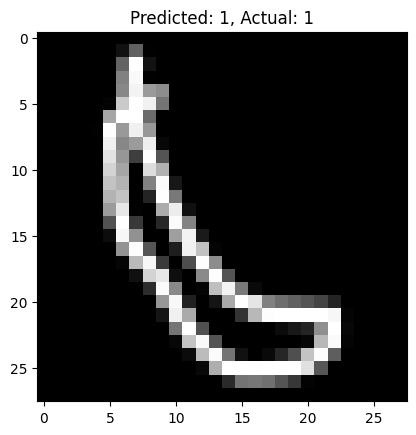

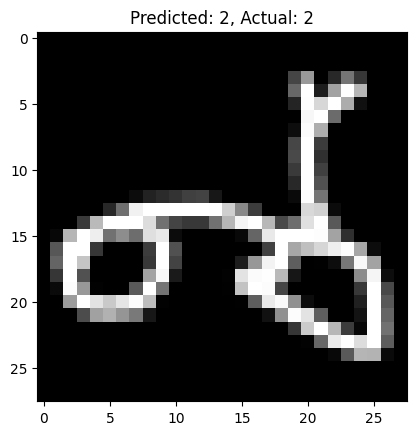

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the data
apple = np.load('quickdraw_data/apple.npy')
banana = np.load('quickdraw_data/banana.npy')
bicycle = np.load('quickdraw_data/bicycle.npy')

# Reduce the dataset size by taking a smaller subset
apple = apple[:2000]
banana = banana[:2000]
bicycle = bicycle[:2000]

# Create labels
apple_labels = np.zeros(len(apple))
banana_labels = np.ones(len(banana))
bicycle_labels = np.full(len(bicycle), 2)

# Combine data and labels
data = np.concatenate([apple, banana, bicycle], axis=0)
labels = np.concatenate([apple_labels, banana_labels, bicycle_labels], axis=0)

# Normalize data
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], 28, 28, 1)

# Convert labels to categorical
labels = to_categorical(labels, num_classes=3)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Display some predictions
predictions = model.predict(x_val[:5])
for i in range(5):
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_val[i])}')
    plt.show()


In [ ]:
# Check dataset balance
print(f'Number of apple samples: {len(apple)}')
print(f'Number of banana samples: {len(banana)}')
print(f'Number of bicycle samples: {len(bicycle)}')


Number of apple samples: 2000
Number of banana samples: 2000
Number of bicycle samples: 2000


In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    # Reshape the image to match the input shape of the model
    img_final = img_normalized.reshape(1, 28, 28, 1)

    return img_final

# Function to visualize the preprocessed image
def visualize_preprocessed_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Find the bounding box of the non-zero pixels (the drawing)
    coords = cv2.findNonZero(cv2.bitwise_not(img))
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the bounding box out of the image
    img_cropped = img[y:y+h, x:x+w]

    # Resize the cropped image to 28x28
    img_resized = cv2.resize(img_cropped, (28, 28))

    # Invert the colors if necessary
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the image
    img_normalized = img_inverted / 255.0

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Preprocessed')
    plt.imshow(img_normalized, cmap='gray')
    plt.show()

def predict(image):
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  return predicted_class



folder_path = '/content/Test data'

# List all files in the folder
image_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path)]

# Load and preprocess images
for image_path in image_paths:
    try:
        visualize_preprocessed_image(image_path)
        processed_image = preprocess_image(image_path)
        predicted_class = predict(processed_image)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {class_names[predicted_class]}')
        plt.show()

    except ValueError as e:
        print(e)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Test data'

In [ ]:
def predict_on():# Upload your image file
  uploaded = files.upload()

  # Get the file name of the uploaded image
  image_path = list(uploaded.keys())[0]

  # Preprocess the image
  processed_image = preprocess_image(image_path)

  # Make a prediction
  prediction = model.predict(processed_image)
  predicted_class = np.argmax(prediction)

  # Display the result
  plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
  plt.title(f'Predicted: {class_names[predicted_class]}')
  plt.show()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()

In [ ]:
predict_on()